# Artifcial Neural Network of 2 Hidden Layers made with Numpy

![title](./img/artificial_neural_network_kl.png)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow import math

### Load example-data

In [2]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples = 50, noise = 0.2, random_state=42)

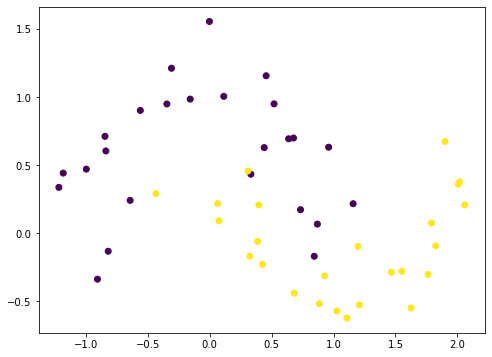

In [3]:
plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c = y)

### Add Bias

In [4]:
def add_bias(arr):
    arr = np.hstack([arr,np.ones((arr.shape[0], 1))]) 
    return arr

In [5]:
X = add_bias(X)


In [6]:
X

array([[-0.15856989,  0.98480618,  1.        ],
       [ 1.10900374, -0.62160223,  1.        ],
       [ 0.39641523,  0.20740869,  1.        ],
       [ 1.79239122,  0.07511293,  1.        ],
       [-0.84739307,  0.71154296,  1.        ],
       [ 1.90209657,  0.67432213,  1.        ],
       [ 0.0731551 ,  0.09079042,  1.        ],
       [-0.43566685,  0.29122072,  1.        ],
       [ 0.42577731, -0.22851359,  1.        ],
       [-0.64418143,  0.24144478,  1.        ],
       [ 0.11289285,  1.00510013,  1.        ],
       [ 0.96066405,  0.63183812,  1.        ],
       [ 1.46814927, -0.28580296,  1.        ],
       [ 0.5192833 ,  0.94984582,  1.        ],
       [ 0.73327397,  0.17310931,  1.        ],
       [ 0.33197143,  0.43375035,  1.        ],
       [ 1.62726102, -0.54736954,  1.        ],
       [ 2.01908805,  0.37804882,  1.        ],
       [ 2.00824323,  0.36058988,  1.        ],
       [-0.56195047,  0.90148197,  1.        ],
       [ 0.67647169,  0.69909987,  1.   

### Define an activation function

In [7]:
def sigmoid(X):
    s = 1/(1+np.exp(-X))
    return s

def tf_sig(x):
    x = math.sigmoid(x)
    return np.array(x)

def sigmoid_deriv(X):
   """derivative of sigmoid with respect to X"""
   return sigmoid(X) * (1-sigmoid(X))

In [8]:
def relu(x):
    return x * (x > 0)

def relu_deriv(x):
    return 1. * (x > 0)

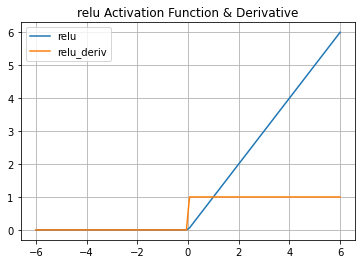

In [9]:
x_data = np.linspace(-6, 6, 100)
y_data = relu(x_data)
dy_data = relu_deriv(x_data)

plt.plot(x_data, y_data, x_data, dy_data)
plt.title('relu Activation Function & Derivative')
plt.legend(['relu', 'relu_deriv'])
plt.grid()
plt.show()


In [10]:
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)


def leaky_relu_deriv(x, alpha=0.01):
    dx = np.ones_like(x)
    dx[x < 0] = alpha
    return dx


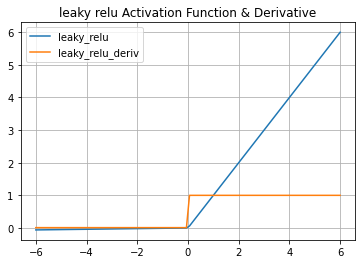

In [11]:
x_data = np.linspace(-6, 6, 100)
y_data = leaky_relu(x_data)
dy_data = leaky_relu_deriv(x_data)

plt.plot(x_data, y_data, x_data, dy_data)
plt.title('leaky relu Activation Function & Derivative')
plt.legend(['leaky_relu', 'leaky_relu_deriv'])
plt.grid()
plt.show()


In [12]:
def tanh(x):
  return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))


def tanh_deriv(x):
  return 1 - tanh(x) * tanh(x)


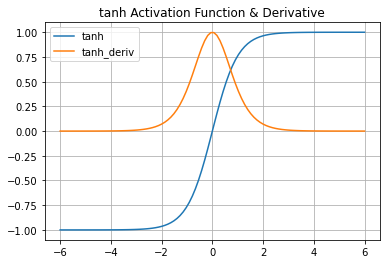

In [13]:
# Generating data for Graph
x_data = np.linspace(-6, 6, 100)
y_data = tanh(x_data)
dy_data = tanh_deriv(x_data)

plt.plot(x_data, y_data, x_data, dy_data)
plt.title('tanh Activation Function & Derivative')
plt.legend(['tanh', 'tanh_deriv'])
plt.grid()
plt.show()

##### Test sigmoid function with the following code

In [14]:
a = np.array([-10.0, -1.0, 0.0, 1.0, 10.0])
expected = np.array([0.0, 0.27, 0.5, 0.73, 1.0])
assert np.all(sigmoid(a).round(2) == expected)

### Weights
Initialized randomly according to the number of neurons with bias

In [15]:
neurons1 = 4
neurons2 = 4
weights_h1 = np.random.normal(size=(X.shape[1],neurons1))
weights_h2 = np.random.normal(size=(neurons1+1, neurons2))
weights_o = np.random.normal(size=(neurons2+1,1))
activationH1 = tanh
derivationH1 = tanh_deriv
activationH2 = tanh
derivationH2 = tanh_deriv
activationO = sigmoid
derivationO = sigmoid_deriv


In [16]:
X.shape, weights_h1.shape, weights_h2.shape, weights_o.shape


((50, 3), (3, 4), (5, 4), (5, 1))

### Forward propagation with two hidden layers

In [17]:
def feed_forward(X, weights):
    """
    1. Calculate the dot product of X
       and the weights of the first layer.
    2. Apply the sigmoid function on the result.
    3. Append an extra column of ones to the result (i.e. the bias).
    4. Calculate the dot product of the previous step
       with the weights of the next (i.e. outer) layer.
    5. Apply the sigmoid function on the result.
    6. Return all intermediate results (i.e. anything that is outputted
       by an activation function).
    """

    weighted_sum = np.dot(X, weights[0])
    output_H1 = activationH1(weighted_sum)

    input_H2 = add_bias(output_H1)
    weighted_sum = np.dot(input_H2, weights[1])
    output_H2 = activationH2(weighted_sum)
    
    input_out = add_bias(output_H2)
    weighted_sum = np.dot(input_out, weights[2])
    output = activationO(weighted_sum)
    
    return output_H1, output_H2, output

### Assertion Test

In [18]:
out1, out2, out3 = feed_forward(X, [weights_h1, weights_h2, weights_o])

In [19]:
assert out1.shape == (50, neurons1)
assert out2.shape == (50, neurons2)
assert out3.shape == (50, 1)

### Calculating Accuracy
- flatten both ytrue and ypred (so that they're both (50,) arrays)
- round the ypred (either up to 1 or down to 0)
- then compare them to eachother to get a boolean array (True where the values are the same, False where they are not)
- sum the boolean array and divide by the length (i.e. take the mean)

In [20]:
def get_accuracy(ypred,ytrue):
    acc = sum(ytrue.flatten() == ypred.flatten().round().astype(np.int64))
    return acc/len(ytrue)

## Backpropagation
Use gradient descent to fit the weights of the whole network.

#### Loss function

In [21]:
def log_loss(ytrue, ypred):
    if ypred == 0 or ypred ==1:
        ypred = ypred + 0.0001 
    loss = -(ytrue*np.log(ypred) + (1-ytrue)*np.log(1-ypred))
    return loss

#### Gradient (derivative) of the loss function

In [22]:
def loss_gradient(ytrue, ypred):
    new_ypred = []
    for n in ypred:
        if n == 0 or n ==1:
            n = n + 0.00001 
        new_ypred.append(n)
    new_ypred_array = np.array(new_ypred)
    loss = -ytrue/new_ypred_array + (1-ytrue)/(1-new_ypred_array)
    return loss


In [23]:
def derivative_Cross_Entropy(y, y_hat):
    for i in y:
        if i == 1:
            return -1/y_hat
        else:
            return 1 / (1 - y_hat)

In [24]:
def delta_cross_entropy(y_true, y_pred):
    """
    X is the output from fully connected layer (num_examples x num_classes)
    y is labels (num_examples x 1)
    	Note that y is not one-hot encoded vector. 
    	It can be computed as y.argmax(axis=1) from one-hot encoded vectors of labels if required.
    """
    y = y_true.argmax(axis=1)
    m = y.shape[0]
    grad = activationO(y_pred)
    grad[range(m), y] -= 1
    grad = grad/m
    return grad


#### Derivative of the sigmoid function

In [25]:
def sigmoid_deriv(X):
   """derivative of sigmoid with respect to X"""
   return sigmoid(X) * (1-sigmoid(X))

### Backpropagation algorithm from scratch

In [26]:
def backprop(weights, output1, output2, output3, ytrue, X_input, LR1, LR2, LR3):  

    wH1 = weights[0]
    wH2 = weights[1]
    wO = weights[2]
    
    ytrue = ytrue.reshape(-1, 1) 
    error = loss_gradient(ytrue, output3)

    sig_deriv = derivationO(output3)
    y_grad = sig_deriv * error

    hidden2_out_with_bias = np.hstack([output2,np.ones((output2.shape[0],1))])
    
    delta_wO = np.dot(-y_grad.transpose(), hidden2_out_with_bias ) * LR3
    wO_new = wO + delta_wO.transpose()

    sig_deriv_2 = derivationH2(output2)
    H2_grad = sig_deriv_2 * np.dot(y_grad, wO[:neurons2].transpose())
    
    hidden1_out_with_bias = np.hstack([output1, np.ones((output1.shape[0], 1))])

    delta_wH2 = np.dot(-H2_grad.transpose(), hidden1_out_with_bias) * LR2
    wH2_new = wH2 + delta_wH2.transpose()

    sig_deriv_3 = derivationH1(output1)
    H1_grad = sig_deriv_3 * np.dot(H2_grad, wH2[:neurons1].transpose())

    delta_wH1 = np.dot(-H1_grad.transpose(), X_input) * LR1
    wH1_new = wH1 + delta_wH1.transpose()

    return wH1_new, wH2_new, wO_new

In [27]:
ACC_VEC = []

weights = [weights_h1, weights_h2, weights_o]
for i in range(50):
    out1, out2, out3 =  feed_forward(X, weights)
    ACC_VEC.append(get_accuracy(out3,y))
    new_weights = backprop(weights,out1,out2,out3,y,X, LR1=0.5, LR2=0.05, LR3=0.001)
    weights = new_weights
print(weights[0].shape, weights[1].shape, weights[2].shape)

(3, 4) (5, 4) (5, 1)


In [28]:
max(ACC_VEC)

0.86

Text(0, 0.5, 'accuracy')

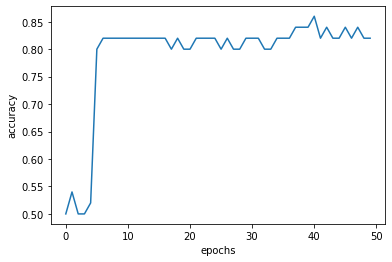

In [29]:
plt.plot(ACC_VEC)
plt.xlabel('epochs')
plt.ylabel('accuracy')

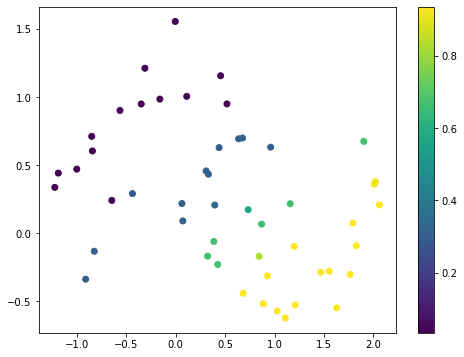

In [30]:
plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c = out3)
plt.colorbar()